# INDENG 242 HW1 Ankit Bhawsar 3038588568 Q3


### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter("ignore", UserWarning)
from sklearn.metrics import roc_curve, auc

### Import Dataset and Print Head

In [2]:
CHD_data = pd.read_csv("Framingham.csv")
CHD_data.info()
CHD_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   object 
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   int64  
 5   BPMeds           3658 non-null   int64  
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   int64  
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   int64  
 14  glucose          3658 non-null   int64  
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 457.4+ KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,College,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,High school/GED,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,Some high school,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,Some college/vocational school,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,Some college/vocational school,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


### Convert Categorical Variables into Binary Dummy Variables

Convert the categorical variable 'education' to binary feature columns.
Store column names in col variable.


In [3]:
CHD_data = pd.get_dummies(CHD_data, columns = ['education'])

cols = CHD_data.columns[CHD_data.columns != "TenYearCHD"]

CHD_data

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_College,education_High school/GED,education_Some college/vocational school,education_Some high school
0,1,39,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0,1,0,0,0
1,0,46,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0,0,1,0,0
2,1,48,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0,0,0,0,1
3,0,61,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1,0,0,1,0
4,0,46,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,1,50,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86,1,0,0,0,1
3654,1,51,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68,0,0,0,1,0
3655,0,52,0,0,0,0,0,0,269,133.5,83.0,21.47,80,107,0,0,1,0,0
3656,1,40,0,0,0,0,1,0,185,141.0,98.0,25.60,67,72,0,0,0,1,0


### Split Dataset into Train and Test in ratio 75%-25%

We use train_test_split function to split the data into training and testing.

Populate X_train, X_test, y_train, y_test variables

In [4]:
CHD_train, CHD_test = train_test_split(CHD_data, test_size=0.25, random_state=123221)
print("Train Shape= ",CHD_train.shape)
print("Test Shape= ",CHD_test.shape)

X_train = CHD_train.drop(columns = 'TenYearCHD')
X_test = CHD_test.drop(columns ='TenYearCHD')

y_train = CHD_train['TenYearCHD']
y_test = CHD_test['TenYearCHD']

print("X Train Shape= ",X_train.shape)
print("y Train Shape= ",y_train.shape)
print("X Test Shape= ",X_test.shape)
print("y Test Shape= ",y_test.shape)


Train Shape=  (2743, 19)
Test Shape=  (915, 19)
X Train Shape=  (2743, 18)
y Train Shape=  (2743,)
X Test Shape=  (915, 18)
y Test Shape=  (915,)


### Print Number of instances where Dependant Variable 0 and 1

We can see majority of data instances show no history of Coronary Heart Disease

In [5]:
default_false = np.sum(CHD_train['TenYearCHD'] == 0)
default_true = np.sum(CHD_train['TenYearCHD'] == 1)

print(pd.Series({'0': default_false, '1': default_true}))


0    2347
1     396
dtype: int64


### Fit Simple Logistic Regression Model to Data

Convert predicted probabilities to binary predictions

In [6]:
model = LogisticRegression()
model.fit(X=X_train,y=y_train)

print("Number of features fitted to model= ",model.n_features_in_)
print()
print("Feature List= \n",model.feature_names_in_)
print()
print("Model Intercept= \n",model.intercept_)
print()
print("Model features coefficients= \n",model.coef_)

y_prob = model.predict_proba(X_test)
y_pred = (y_prob[:,1] >= 0.4).astype('int64')

Number of features fitted to model=  18

Feature List= 
 ['male' 'age' 'currentSmoker' 'cigsPerDay' 'BPMeds' 'prevalentStroke'
 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP' 'BMI' 'heartRate'
 'glucose' 'education_College' 'education_High school/GED'
 'education_Some college/vocational school' 'education_Some high school']

Model Intercept= 
 [-0.29491056]

Model features coefficients= 
 [[ 0.4000621   0.02161698 -0.17077646  0.019903    0.1458911   0.0267067
   0.62152015  0.13407118 -0.00071583  0.0197001  -0.03074987 -0.0664184
  -0.02092755  0.0035105  -0.0281605  -0.36324412 -0.15107709  0.24851811]]


---
## Q3) (a) (ii)

**Here we see the intercept and different coefficients assigned by the model while fitting the data.**

**We know the logistic regression model is as follows:**

**P(x) = e^(Z)/ (1 + e^(Z))**

**where Z = intercept + coeff_1(x1) + coeff_2(x2) + ... + coeff_p(xp)**

**We can rewrite the above equation for our model as:**

**P(x) = e^(Z)/ (1 + e^(Z))**

**where Z = -0.2941 + 0.4000621(x1) + 0.02161698(x2) - 0.17077646(x3) + ... + 0.24851811(x18)**

**or**

**Z = -0.2941 + 0.4000621(male) + 0.02161698(age) - 0.17077646(currentSmoker) + ... + 0.24851811(education_Some high school)**

---


### Find Confusion Matrix, Accuracy, TPR, FPR for the model

First find the confusion matrix using confusion_matrix function from the sklearn.metrics library.
Then use the values to find Accuracy, TPR, FPR

In [7]:
cm = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = cm.ravel()

acc = (tp+tn)/(tn+fp+fn+tp)
tpr = (tp)/(tp+fn)
fpr = (fp)/(fp+tn)

print("================================================")
print("Confusion Matrix:\n",cm)
print("Model Accuracy is= ",acc)
print("True Positive Rate= ",tpr)
print("False Positive Rate= ",fpr)
print("================================================")

Confusion Matrix:
 [[738  16]
 [146  15]]
Model Accuracy is=  0.8229508196721311
True Positive Rate=  0.09316770186335403
False Positive Rate=  0.021220159151193633


---

## Q3) (a) (iii)

<ins>**Accuracy:**</ins>

**Accuracy of a model can be defined as the ratio between the number of correct predictions that the model made and the total number of predictions the model made. This metric is usefull while evaluating the perfomance of the model but one of the key disadvantages of this is that it does not factor in the weightage of False Negatives and False Positives. The model may show high accuracy but not be very usefull in real life situations.**

**For example, in our case, predicting less False Negatives is more important than predicting less False Positives since not predicting the disease is deadlier than predicting it when it isn't present.**

<ins>**True Positive Rate (TPR):**</ins>

**TPR of a model can be defined as the ratio between the number of Positive cases that the model correctly predicts and the total number of Positive predictions in reality. This metric is also called as sensitivity.**

**In our case, sensitivity is very important as it describes the percent of people having the disease that are detected by the model**

<ins>**False Positive Rate (TPR):**</ins>

**TPR of a model can be defined as the ratio between the number of Negative cases that the model incorrectly predicts and the total number of Negative predictions in reality. It’s the probability that a false alarm will be raised: that a positive result will be given when the true value is negative.**

**In our case, a high FPR is not of importance as detecting a disease when its not present means the models plays it safe and predicts more False positives**


---

### Plot ROC Curve

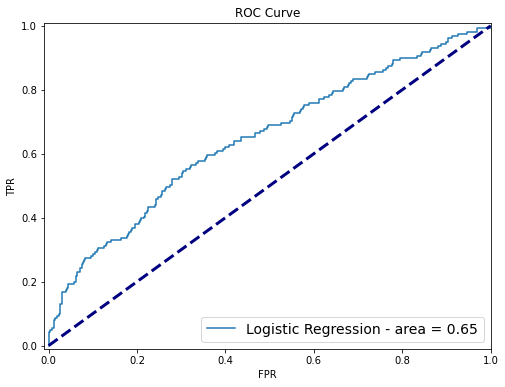

In [8]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, label='Logistic Regression - area = {:0.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

### Fit Balanced Logistic Regression Model to Data

Convert predicted probabilities to binary predictions

In [9]:
balanced_model = LogisticRegression(class_weight='balanced')
balanced_model.fit(X=X_train,y=y_train)


print("Number of features fitted to model= ",balanced_model.n_features_in_)
print()
print("Feature List= \n",balanced_model.feature_names_in_)
print()
print("Model Intercept= \n",balanced_model.intercept_)
print()
print("Model features coefficients= \n",balanced_model.coef_)

y_prob = balanced_model.predict_proba(X_test)
y_pred = (y_prob[:,1] >= 0.4).astype('int64')


Number of features fitted to model=  18

Feature List= 
 ['male' 'age' 'currentSmoker' 'cigsPerDay' 'BPMeds' 'prevalentStroke'
 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP' 'BMI' 'heartRate'
 'glucose' 'education_College' 'education_High school/GED'
 'education_Some college/vocational school' 'education_Some high school']

Model Intercept= 
 [-0.41762854]

Model features coefficients= 
 [[ 5.34111706e-01  2.79955269e-02 -1.47139426e-01  2.08224685e-02
   2.00701713e-01  3.24030992e-02  7.64196557e-01  2.34884798e-01
   7.49497193e-04  2.00258523e-02 -3.06714391e-02 -5.01145124e-02
  -1.15879738e-02  2.51159237e-03 -4.66268097e-02 -3.29925964e-01
  -1.78038287e-01  1.38678562e-01]]



### Find Confusion Matrix, Accuracy, TPR, FPR for the balanced model

In [10]:

cm = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = cm.ravel()

acc = (tp+tn)/(tn+fp+fn+tp)
tpr = (tp)/(tp+fn)
fpr = (fp)/(fp+tn)


print("================================================")
print("Confusion Matrix:\n",cm)
print("Model Accuracy is= ",acc)
print("True Positive Rate= ",tpr)
print("False Positive Rate= ",fpr)
print("================================================")

Confusion Matrix:
 [[346 408]
 [ 36 125]]
Model Accuracy is=  0.5147540983606558
True Positive Rate=  0.7763975155279503
False Positive Rate=  0.5411140583554377


### Plot ROC Curve for Balanced Model

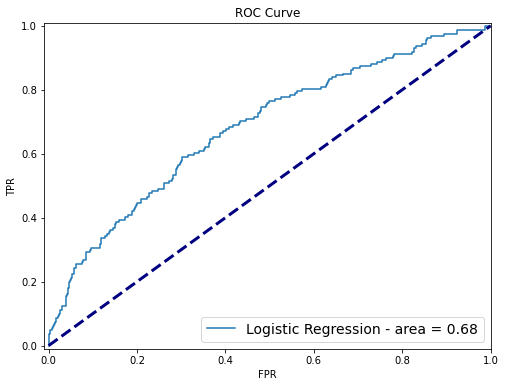

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, label='Logistic Regression - area = {:0.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

Normal Model 
================================================

Confusion Matrix:

 [[738  16]
 
 [146  15]]
 
Model Accuracy is=  0.8229508196721311

True Positive Rate=  0.09316770186335403

False Positive Rate=  0.021220159151193633

================================================

Balanced Model
================================================

Confusion Matrix:

 [[346 408]
 
 [ 36 125]]

 
Model Accuracy is=  0.5147540983606558

True Positive Rate=  0.7763975155279503

False Positive Rate=  0.5411140583554377

================================================

---

## Q3) (b) (iii)

**Balanced models are typically used when there is big difference in the number of instances per class in our data. i.e. the Dataset is skewed towards one class.**

**As we saw when we loaded he data, there were 2347 instances of class 0, and 396 instances of class 1. This means our dataset is skewed toward the absence of disease. This is why when we used the normal unbalanced model to fit the data, we saw that even though accuracy was high, TPR was low, meaning the model was predicting more disease absences.**

**When we fitted the balanced model on the data, we saw that even thought the accuracy decreased, the TPR and FPR increased significantly, meaning out model started predicting more and more positive values.**

**In conclusion, evaluation of a model can be done in a variety of factors. If you are focused on improving accuracy, the first model will be better, but in out case, when the classes are skewed, we need better metrics to judge the performance, such as TPR and FPR which tell us the balanced model is better for our data.**


---